# Statement

S09 T01: Practice with training and test sets

Description
Get familiar with scientific programming using the SKLearn / Scikitlearn library.

Level 1 - Exercise 1
Split the data set DelayedFlights.csv into train and test. Study the two sets separately, at a descriptive level.

Level 2 - Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

Level 3 - Exercise 3
Summarize the new columns generated in a statistical and graphical way.  

# Dataset information: ✈
![](2022-02-28-17-46-54.png)

# Level 1 - Exercise 1.
Split the data set DelayedFlights.csv into train and test. Study the two sets separately, at a descriptive level.

In [1]:
# Import libraries
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Personal functions
import Pers_lib as Pers

In [3]:
# Test
# print("Number of unique values is: %.0f" %df['Origin'].unique().size)
# df['Origin'].unique().size
# print(df['Origin'].unique())

In [4]:
# Read csv to dataframe
df = pd.read_csv('..\Data\DelayedFlights.csv')

In [5]:
# settings to display all columns (default is 20, now is None (all))
pd.set_option("display.max_columns", None)

In [6]:
# Description of raw dataframe
Pers.df_info(df)

[-------------------------SHAPE------------------------]


(1936758, 30)

[-------------------------INFO-------------------------]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object

None

[-----------------------DESCRIBE-----------------------]


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758,1936758.00,1936753,1928371.00,1936560.00,1928371.00,1928371.00,1936758.00,1936758,1936758,1936758.00,1929648.00,1936303.00,1936758.00,1936758,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5366,NaN,NaN,NaN,NaN,NaN,303,304,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,NaN,NaN,NaN,NaN,NaN,ATL,ORD,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,965,NaN,NaN,NaN,NaN,NaN,131613,108984,NaN,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,3341651.15,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,NaN,2184.26,NaN,133.31,134.30,108.28,42.20,43.19,NaN,NaN,765.69,6.81,18.23,0.00,NaN,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,NaN,1944.70,NaN,72.06,71.34,68.64,56.78,53.40,NaN,NaN,574.48,5.27,14.34,0.02,NaN,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,1.00,NaN,14.00,-25.00,0.00,-109.00,6.00,NaN,NaN,11.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,NaN,610.00,NaN,80.00,82.00,58.00,9.00,12.00,NaN,NaN,338.00,4.00,10.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,NaN,1543.00,NaN,116.00,116.00,90.00,24.00,24.00,NaN,NaN,606.00,6.00,14.00,0.00,NaN,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,NaN,3422.00,NaN,165.00,165.00,137.00,56.00,53.00,NaN,NaN,998.00,8.00,21.00,0.00,NaN,0.00,21.00,0.00,15.00,0.00,33.00


[------------------------NaN's-------------------------]


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

[--------------Values in categorical variables---------]
------------------UniqueCarrier-------------------
------------Unique Values--------------
Number of unique values is: 20
['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
------------Value Counts--------------


WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

------------------TailNum-------------------
------------Unique Values--------------
Number of unique values is: 5367
['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008']
------------Value Counts--------------


N325SW    965
N676SW    951
N658SW    945
N313SW    937
N308SA    936
         ... 
9189E       1
N853NW      1
N856NW      1
N76010      1
N78008      1
Name: TailNum, Length: 5366, dtype: int64

------------------Origin-------------------
------------Unique Values--------------
Number of unique values is: 303
['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' '

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BJI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: Origin, Length: 303, dtype: int64

------------------Dest-------------------
------------Unique Values--------------
Number of unique values is: 304
['TPA' 'BWI' 'JAX' 'LAS' 'MCO' 'MDW' 'PHX' 'FLL' 'PBI' 'RSW' 'HOU' 'BHM'
 'BNA' 'IND' 'PHL' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BOI' 'BUF' 'BUR' 'CLE'
 'CMH' 'DEN' 'ELP' 'GEG' 'IAD' 'ISP' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MHT'
 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PDX' 'PIT' 'PVD' 'RDU' 'RNO' 'SAN'
 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF' 'SNA' 'STL' 'TUL' 'TUS' 'DAL'
 'DTW' 'JAN' 'HRL' 'CRP' 'EWR' 'IAH' 'ROC' 'MYR' 'GSO' 'SAV' 'RIC' 'COS'
 'FAT' 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'CAE' 'DFW' 'DAY' 'MSP' 'GSP' 'MEM'
 'TYS' 'SHV' 'BTV' 'MFE' 'PWM' 'ATL' 'SYR' 'MKE' 'HSV' 'BTR' 'CHS' 'MSN'
 'LFT' 'LRD' 'SRQ' 'CLT' 'VPS' 'AVL' 'GPT' 'LGA' 'ABE' 'BGR' 'DCA' 'ORD'
 'GRR' 'MOB' 'PNS' 'CHA' 'MGM' 'CVG' 'GRK' 'PSP' 'TLH' 'LCH' 'BOS' 'BRO'
 'XNA' 'BPT' 'LEX' 'MTJ' 'AEX' 'MLU' 'DSM' 'CRW' 'CLL' 'ILM' 'JFK' 'ASE'
 'CPR' 'DRO' 'RAP' 'KOA' 'LIH' 'OGG' 'MDT' 'ROA' 'SPI' 'HNL' 'MFR' 'ATW'
 'BMI' 'CA

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
        ...  
INL         9
PIR         3
CYS         1
TUP         1
OGD         1
Name: Dest, Length: 304, dtype: int64

------------------CancellationCode-------------------
------------Unique Values--------------
Number of unique values is: 4
['N' 'A' 'B' 'C']
------------Value Counts--------------


N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

## Data PreProcessing. 

In [7]:
# Let's explore our data now.
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Delete columns that we find not relevant for our model.
try:
    # Let's clean first column that is repeated index.
    df = df.drop(columns ='Unnamed: 0')
    # Let's delete FlightNum and TailNum as these columns doesn't give us any useful information.
    df = df.drop(columns=['FlightNum','TailNum'])
    # Let's delete Origin and Dest as this info is already in Distance column.
    df = df.drop(columns=['Origin','Dest'])
    # Finally, let's drop the columns of Delays that are not ArrDelay, because ArrDelay is the sum of all others, and we don't think that 
    # the information of what kind of delay is, will be relevant.
    df = df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
except:
    print("Columns already deleted")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,N,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,N,0
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,N,0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,N,0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,N,0


In [9]:
# Delete duplicates
index_dupl_df = df.duplicated()
print("Num. duplicates =", index_dupl_df.sum())

Num. duplicates = 3


In [10]:
# As there are very few duplicates, we took them off.
df.drop_duplicates(inplace= True)

In [11]:
# Create column Date of the flight and delete the columns Year / Month / Day of Month. We keep DayOfWeek for potential correlations.
## Date of the flight
try:
    df['Date'] = pd.to_datetime(df.Year.astype(str)+'-'+ df.Month.astype(str)+'-'+ df.DayofMonth.astype(str))
    df = df.drop(columns=['Year','Month','DayofMonth'])
except:
    print("Date column already created and columns Year, Month & DayofMonth already deleted")
df.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Date
0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,N,0,2008-01-03
1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,N,0,2008-01-03
2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,N,0,2008-01-03
3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,N,0,2008-01-03
4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,N,0,2008-01-03


#### NaN Processing.

In [12]:
# Visualize existing NaN's
list_cols = df.columns
display(df[list_cols].isnull().sum())

DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
Date                    0
dtype: int64

In [13]:
# Visualize % NaNs of every column.
NumTotalRegisters = df.shape[0]
for i in list_cols:
    print(f"% of NaNs in {i} are {(df[i].isnull().sum()/NumTotalRegisters)*100:.1f}%") 

% of NaNs in DayOfWeek are 0.0%
% of NaNs in DepTime are 0.0%
% of NaNs in CRSDepTime are 0.0%
% of NaNs in ArrTime are 0.4%
% of NaNs in CRSArrTime are 0.0%
% of NaNs in UniqueCarrier are 0.0%
% of NaNs in ActualElapsedTime are 0.4%
% of NaNs in CRSElapsedTime are 0.0%
% of NaNs in AirTime are 0.4%
% of NaNs in ArrDelay are 0.4%
% of NaNs in DepDelay are 0.0%
% of NaNs in Distance are 0.0%
% of NaNs in TaxiIn are 0.4%
% of NaNs in TaxiOut are 0.0%
% of NaNs in Cancelled are 0.0%
% of NaNs in CancellationCode are 0.0%
% of NaNs in Diverted are 0.0%
% of NaNs in Date are 0.0%


#### Observation 1:  
As we see, % of NaNs is very little in all the columns (0.4% max).   
We are going to drop all NaNs in all columns.  
**Exception:** In Delays columns the percentage was big (35.6%), but these columns have been already dropped.

In [14]:
# Drop all NaNs
array_cols = list_cols.values
df = df.dropna(subset=array_cols)
print(f"Number of registers deleted are {NumTotalRegisters-df.shape[0]}")
print(f"% of registers with NaNs deleted are {((NumTotalRegisters-df.shape[0])/NumTotalRegisters)*100:.2f}%")

Number of registers deleted are 8387
% of registers with NaNs deleted are 0.43%


In [15]:
#Explore dataset now:
Pers.df_info(df)

[-------------------------SHAPE------------------------]


(1928368, 18)

[-------------------------INFO-------------------------]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 1936757
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          int64         
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      object        
 6   ActualElapsedTime  float64       
 7   CRSElapsedTime     float64       
 8   AirTime            float64       
 9   ArrDelay           float64       
 10  DepDelay           float64       
 11  Distance           int64         
 12  TaxiIn             float64       
 13  TaxiOut            float64       
 14  Cancelled          int64         
 15  CancellationCode   object        
 16  Diverted           int64         
 17  Date               datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(6), o

None

[-----------------------DESCRIBE-----------------------]


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Date
count,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.0,1928368,1928368.0,1928368
unique,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,376200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928368,NaN,NaN
mean,3.98,1518.65,1467.72,1610.24,1634.20,NaN,133.31,134.20,108.28,42.20,43.09,764.95,6.81,18.22,0.0,NaN,0.0,2008-06-19 02:24:18.334094080
min,1.00,1.00,0.00,1.00,0.00,NaN,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.0,NaN,0.0,2008-01-01 00:00:00
25%,2.00,1203.00,1135.00,1316.00,1325.00,NaN,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.0,NaN,0.0,2008-03-18 00:00:00
50%,4.00,1545.00,1510.00,1715.00,1705.00,NaN,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.0,NaN,0.0,2008-06-14 00:00:00
75%,6.00,1900.00,1815.00,2030.00,2014.00,NaN,165.00,165.00,137.00,56.00,53.00,997.00,8.00,21.00,0.0,NaN,0.0,2008-09-09 00:00:00
max,7.00,2400.00,2359.00,2400.00,2359.00,NaN,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,0.0,NaN,0.0,2008-12-31 00:00:00


[------------------------NaN's-------------------------]


DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
Date                 0
dtype: int64

[--------------Values in categorical variables---------]
------------------UniqueCarrier-------------------
------------Unique Values--------------
Number of unique values is: 20
['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
------------Value Counts--------------


WN    376200
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52453
9E     51569
AS     39010
F9     28222
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

------------------CancellationCode-------------------
------------Unique Values--------------
Number of unique values is: 1
['N']
------------Value Counts--------------


N    1928368
Name: CancellationCode, dtype: int64

#### Observation 2:

We observe now in the dataset the following:  
![](2022-03-02-17-16-43.png)![](2022-03-02-17-10-48.png)  
It says that in these three columns there are no information.
That means that when whe have deleted NaN's registers, we have deleted the information of cancelled or diverted flights.  
As they were so few, is ok to delete them. But also they could be useful for another exploration. 
In other dataset / practice we could only extract the cancelled / diverted flights to arrive to interesting conclusions.

In [16]:
# Delete these three columns of the dataset.
df = df.drop(columns=['Cancelled','CancellationCode','Diverted'])

In [17]:
### Finally, we are going to sample our data, a total of 1% random, stratifying by airline.
NumTotalRegisters = df.shape[0]
NumTotalRegisters
TotalSample = NumTotalRegisters * 0.01
AirlinesCounts = pd.DataFrame(df.UniqueCarrier.value_counts())
AirlinesCounts['Proportion']=AirlinesCounts['UniqueCarrier'] / NumTotalRegisters
AirlinesCounts['Samples'] = round(AirlinesCounts.Proportion *TotalSample)
AirlinesCounts

,UniqueCarrier,Proportion,Samples
WN,376200,0.195087,3762.0
AA,190910,0.099001,1909.0
MQ,141223,0.073234,1412.0
UA,140904,0.073069,1409.0
OO,131780,0.068338,1318.0
DL,113728,0.058976,1137.0
XE,103147,0.053489,1031.0
CO,99731,0.051718,997.0
US,98007,0.050824,980.0
EV,81762,0.042400,818.0


In [18]:
AirlinesCounts.loc[['WN'],:]

,UniqueCarrier,Proportion,Samples
WN,376200,0.195087,3762.0


In [19]:
# Sampling:
df_sample = pd.DataFrame()
for Airline in AirlinesCounts.index:
    NumSamples = int(AirlinesCounts.loc[[Airline],:].Samples)
    df_sample = df_sample.append(df[df.UniqueCarrier == Airline].sample(NumSamples,random_state=1))

In [20]:
# Finally, we describe the cleaned dataset and save it:
display(df_sample.shape)
display(df_sample.describe(include='all',datetime_is_numeric=True).round(2))
df_sample.to_csv('..\Data\DelayedFlights__cleaned_sample.csv')

(19283, 15)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
count,19283.00,19283.00,19283.00,19283.00,19283.00,19283,19283.00,19283.00,19283.00,19283.00,19283.00,19283.00,19283.00,19283.00,19283
unique,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.98,1519.20,1467.97,1611.58,1633.48,NaN,133.38,134.33,108.38,41.67,42.62,765.85,6.81,18.19,2008-06-18 19:15:10.874863872
min,1.00,2.00,15.00,1.00,0.00,NaN,20.00,15.00,7.00,-59.00,6.00,31.00,0.00,1.00,2008-01-01 00:00:00
25%,2.00,1204.00,1135.00,1317.50,1325.00,NaN,81.00,82.00,58.00,9.00,12.00,342.00,4.00,10.00,2008-03-18 00:00:00
50%,4.00,1544.00,1510.00,1715.00,1705.00,NaN,116.00,117.00,90.00,24.00,24.00,606.00,6.00,14.00,2008-06-13 00:00:00
75%,6.00,1859.00,1815.00,2029.00,2012.00,NaN,165.00,165.00,137.00,55.00,53.00,992.00,8.00,21.00,2008-09-09 00:00:00
max,7.00,2400.00,2359.00,2400.00,2359.00,NaN,647.00,660.00,622.00,832.00,813.00,4962.00,145.00,274.00,2008-12-31 00:00:00


## Split the dataset into train and test.

In [21]:
# split into train test sets (33% for test)
df_train, df_test = train_test_split(df_sample, test_size=0.33)

## Describe both sets 

In [22]:
# Describe set train
df_train_describe = df_train.describe(datetime_is_numeric=True).round(2)
display(df_train_describe)
print(f"Shape = {df_train.shape}")

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
count,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919.00,12919
mean,3.98,1517.80,1466.75,1607.99,1629.61,133.78,134.78,108.77,41.41,42.42,769.78,6.83,18.17,2008-06-19 03:35:27.564052736
min,1.00,3.00,15.00,1.00,0.00,20.00,24.00,7.00,-59.00,6.00,31.00,0.00,1.00,2008-01-01 00:00:00
25%,2.00,1203.00,1130.00,1314.00,1320.00,81.00,82.00,58.00,9.00,12.00,342.00,4.00,10.00,2008-03-19 00:00:00
50%,4.00,1544.00,1510.00,1716.00,1709.00,116.00,117.00,90.00,24.00,24.00,607.00,6.00,14.00,2008-06-14 00:00:00
75%,6.00,1858.00,1815.00,2027.00,2010.00,165.00,165.00,137.00,55.00,52.00,992.00,8.00,21.00,2008-09-09 00:00:00
max,7.00,2400.00,2359.00,2400.00,2359.00,647.00,660.00,622.00,832.00,813.00,4962.00,145.00,274.00,2008-12-31 00:00:00
std,2.00,448.55,423.00,547.74,466.60,72.68,71.81,69.35,52.98,49.46,579.43,5.37,14.02,NaN


Shape = (12919, 15)


In [23]:
# Describe set test 
df_test_describe = df_test.describe(datetime_is_numeric=True).round(2)
display(df_test_describe)
print(f"Shape = {df_test.shape}")

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
count,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364.00,6364
mean,3.99,1522.04,1470.45,1618.86,1641.34,132.58,133.41,107.58,42.18,43.01,757.89,6.76,18.24,2008-06-18 02:19:36.618479104
min,1.00,2.00,30.00,1.00,1.00,30.00,15.00,15.00,-38.00,6.00,49.00,1.00,1.00,2008-01-01 00:00:00
25%,2.00,1204.00,1140.00,1325.00,1335.00,81.00,82.00,58.00,8.00,12.00,341.00,4.00,10.00,2008-03-16 00:00:00
50%,4.00,1544.00,1508.00,1712.00,1700.00,116.00,115.00,90.00,24.00,24.00,602.00,5.00,14.00,2008-06-12 00:00:00
75%,6.00,1901.00,1820.00,2032.25,2015.00,165.00,165.00,137.00,56.00,54.00,992.00,8.00,21.00,2008-09-06 06:00:00
max,7.00,2359.00,2359.00,2400.00,2359.00,511.00,529.00,489.00,623.00,633.00,4502.00,90.00,191.00,2008-12-31 00:00:00
std,1.98,445.24,419.33,541.77,456.08,70.94,70.34,67.87,55.21,51.25,566.16,5.18,14.44,NaN


Shape = (6364, 15)


In [24]:
# Compare statistical both sets
df_comp_describe = df_train_describe-df_test_describe
df_comp_describe

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
count,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555.00,6555
mean,-0.01,-4.24,-3.70,-10.87,-11.73,1.20,1.37,1.19,-0.77,-0.59,11.89,0.07,-0.07,1 days 01:15:50.945573632
min,0.00,1.00,-15.00,0.00,-1.00,-10.00,9.00,-8.00,-21.00,0.00,-18.00,-1.00,0.00,0 days 00:00:00
25%,0.00,-1.00,-10.00,-11.00,-15.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,3 days 00:00:00
50%,0.00,0.00,2.00,4.00,9.00,0.00,2.00,0.00,0.00,0.00,5.00,1.00,0.00,2 days 00:00:00
75%,0.00,-43.00,-5.00,-5.25,-5.00,0.00,0.00,0.00,-1.00,-2.00,0.00,0.00,0.00,2 days 18:00:00
max,0.00,41.00,0.00,0.00,0.00,136.00,131.00,133.00,209.00,180.00,460.00,55.00,83.00,0 days 00:00:00
std,0.02,3.31,3.67,5.97,10.52,1.74,1.47,1.48,-2.23,-1.79,13.27,0.19,-0.42,NaN


#### Observation 3:
* We see that the comparation of both statistical sets, are quite similar, in mean and also in std dev. 
* We see some outlayers dif. in max value on Time columns.

# Level 2 - Exercise 2.
### Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).



#### Let's standardize the numerical columns:   
**Exception:** We don't standardize the day of week.

In [25]:
# Let's standardize the numerical columns (df_train):
list_num_cols = df_train._get_numeric_data().columns
print(list_num_cols)

Index(['DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')


In [26]:
# Standardize df_train
# list for cols to scale (all except for day of week).
cols_to_scale = ['DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut']
#create and fit scaler
scaler = StandardScaler()
scaler.fit(df_train[cols_to_scale])
#scale selected data
df_train[cols_to_scale] = scaler.transform(df_train[cols_to_scale])

df_train.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
1212168,2,1.396108,1.553827,1.265258,1.312513,NW,-0.781188,-0.790736,-0.818653,-0.423085,-0.453348,-0.683070,-0.341142,0.130433,2008-07-29
1623304,2,-0.699602,-0.997079,-0.540408,-0.920752,CO,-0.905020,-0.832512,-0.804233,0.577369,0.739595,-0.783172,-0.154948,-0.654312,2008-10-07
914605,4,0.049503,0.125887,0.575125,0.600955,WN,0.402102,0.490397,0.551251,-0.536344,-0.453348,0.708000,-0.713531,-0.368950,2008-06-26
642853,4,-0.445441,-0.394224,0.222755,0.198024,US,0.801118,0.936008,0.868492,-0.630727,-0.493787,0.918559,-0.341142,-0.012248,2008-04-10
112693,5,0.004914,-0.082158,0.184414,-0.012015,FL,-0.340894,-0.317274,-0.227431,0.067703,0.112794,-0.334439,0.217440,-0.725652,2008-01-11


In [27]:
# Standardize df_test
#create and fit scaler
scaler = StandardScaler()
scaler.fit(df_test[cols_to_scale])
#scale selected data
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

df_test.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date
880325,6,-1.823944,-1.944788,-1.260533,-1.568576,DL,0.189117,0.250020,0.109294,-0.582996,-0.546662,0.005498,1.589749,-0.155199,2008-05-10
1856477,1,0.215545,0.130093,0.194082,-0.020472,FL,-0.092822,-0.091189,-0.052790,0.177841,0.194912,-0.116385,0.239096,-0.293704,2008-12-01
1907162,2,-0.900783,-0.990819,-0.112347,-0.211244,AA,0.344183,0.520144,0.462933,-0.528651,-0.331996,0.729733,-0.146805,-0.432210,2008-12-23
1359527,7,0.756863,0.893268,1.347805,1.496933,F9,0.527443,0.363756,0.477668,-0.311269,-0.566177,0.576054,-0.146805,0.398824,2008-08-17
60671,1,0.015639,-0.311117,0.343604,-0.059942,OO,-0.515730,-0.560351,-0.465368,1.246637,1.287758,-0.409612,1.203848,-0.778474,2008-01-21


#### Let's create dummy columns of the only categorical column that we have: **Unique Carrier** attribute.  
First, let's explore this column quantitative speaking.

In [28]:
print("[--------------Values in Unique Carrier attribute---------]")
print("------------Unique Values--------------")
print("Number of unique values is: %.0f" %df_sample['UniqueCarrier'].unique().size)
print(df_sample['UniqueCarrier'].unique())
print("------------Value Counts--------------")
display(df_sample['UniqueCarrier'].value_counts())

[--------------Values in Unique Carrier attribute---------]
------------Unique Values--------------
Number of unique values is: 20
['WN' 'AA' 'MQ' 'UA' 'OO' 'DL' 'XE' 'CO' 'US' 'EV' 'NW' 'FL' 'YV' 'B6'
 'OH' '9E' 'AS' 'F9' 'HA' 'AQ']
------------Value Counts--------------


WN    3762
AA    1909
MQ    1412
UA    1409
OO    1318
DL    1137
XE    1031
CO     997
US     980
EV     818
NW     788
FL     710
YV     668
B6     549
OH     525
9E     516
AS     390
F9     282
HA      75
AQ       7
Name: UniqueCarrier, dtype: int64

#### Observation 3:  
As we see, there are too many unique values to do OHE, we  have to choose the first 5/10 more important and then use a last one with all the others.
Our criteria is going to be Airlines with more than 100.000 flights, for the others we will sum them as "others".


In [29]:
# Sum all "others" airlines flights
Airline_Serie = df_sample['UniqueCarrier'].value_counts()
sum=0
for i in Airline_Serie:
    if i < 100000:
        sum = sum +i
print ("Sum of airlines with less than 100.000 flights is: %.0f"%sum)

Sum of airlines with less than 100.000 flights is: 19283


Sum of other flights would be too important, so finally, let's do OHE with all columns, as is our variable of interest.

In [30]:
# Get dummies of all unique values of attribute UniqueCarrier.
try:
    df_train_norm = pd.get_dummies(df_train,columns=['UniqueCarrier'])
    display(df_train_norm.head())
    df_test_norm = pd.get_dummies(df_test,columns=['UniqueCarrier'])
    df_test_norm.head()
except:
    print("OHE already applied")
    display(df_train_norm.head())
    display(df_test_norm.head())

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Date,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1212168,2,1.396108,1.553827,1.265258,1.312513,-0.781188,-0.790736,-0.818653,-0.423085,-0.453348,-0.683070,-0.341142,0.130433,2008-07-29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1623304,2,-0.699602,-0.997079,-0.540408,-0.920752,-0.905020,-0.832512,-0.804233,0.577369,0.739595,-0.783172,-0.154948,-0.654312,2008-10-07,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
914605,4,0.049503,0.125887,0.575125,0.600955,0.402102,0.490397,0.551251,-0.536344,-0.453348,0.708000,-0.713531,-0.368950,2008-06-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
642853,4,-0.445441,-0.394224,0.222755,0.198024,0.801118,0.936008,0.868492,-0.630727,-0.493787,0.918559,-0.341142,-0.012248,2008-04-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
112693,5,0.004914,-0.082158,0.184414,-0.012015,-0.340894,-0.317274,-0.227431,0.067703,0.112794,-0.334439,0.217440,-0.725652,2008-01-11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Level 3 - Exercise 3

#### Summarize the new columns generated in a statistical and graphical way.  

In [31]:
round(df_train_norm.describe(),3)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.0,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000,12919.000
mean,3.975,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.027,0.1,0.000,0.020,0.028,0.050,0.058,0.043,0.014,0.037,0.004,0.074,0.040,0.028,0.068,0.073,0.050,0.193,0.054,0.036
std,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.163,0.3,0.018,0.141,0.165,0.218,0.234,0.203,0.119,0.188,0.061,0.262,0.196,0.165,0.252,0.261,0.217,0.395,0.227,0.187
min,1.000,-3.377,-3.432,-2.934,-3.493,-1.565,-1.543,-1.468,-1.895,-0.736,-1.275,-1.272,-1.225,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,-0.702,-0.796,-0.537,-0.664,-0.726,-0.735,-0.732,-0.612,-0.615,-0.738,-0.527,-0.583,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,0.058,0.102,0.197,0.170,-0.245,-0.248,-0.271,-0.329,-0.372,-0.281,-0.155,-0.298,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,6.000,0.758,0.823,0.765,0.815,0.430,0.421,0.407,0.256,0.194,0.384,0.217,0.202,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,7.000,1.967,2.109,1.446,1.563,7.062,7.314,7.401,14.924,15.581,7.235,25.726,18.251,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


As we can see, all numerical columns have mean of 0 and std variance of 1 (after standardization).  
**Exception** are the dummies columns, of course, they are numerical but they must remain as bool columns. 

In [32]:
# Show our numerical columns
display(cols_to_scale)
display(len(cols_to_scale))

['DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut']

12

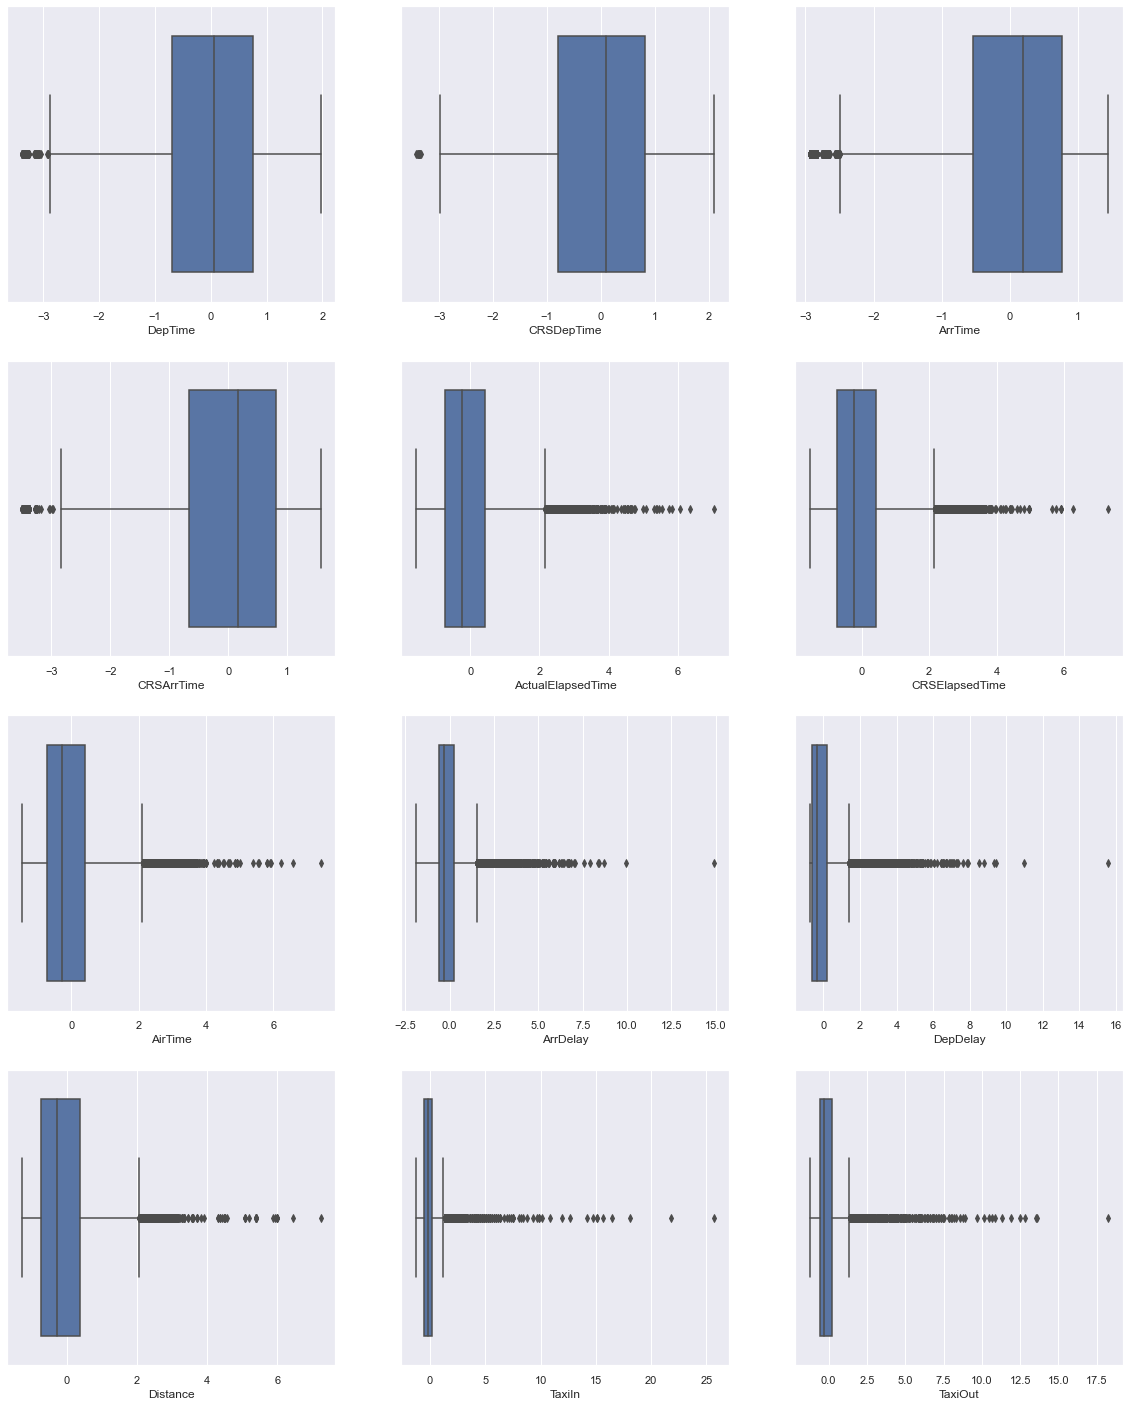

In [33]:
#Let's plot a boxplot for all numerical columns not bool or date related
fig, axes = plt.subplots(round(len(cols_to_scale)/3), 3,figsize=(20,25))
for i,x_par in enumerate(cols_to_scale):
    x, y = divmod(i, 3)
    sns.boxplot(x=x_par,data=df_train_norm, ax=axes[x,y])

As we observed on describe, all these columns have the mean = 0 and std dev = 1 after standardization.  
The difference between them are the quantity of outlayers.

In [34]:
# Let's save both datasets train and test normalized and standardized
df_train_norm.to_csv('..\Data\DelayedFlights_train.csv')
df_test_norm.to_csv('..\Data\DelayedFlights_test.csv')